In [1]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
# Load data from CSV file
data = pd.read_csv('../../../Dataset/AKAM_Stock.csv')

# Tiền xử lí dữ liệu
# Hàm chuyển đổi "Vol." từ chuỗi sang số
def convert_volume_to_number(volume_str):
    if volume_str[-1] == 'K':
        return int(float(volume_str[:-1]) * 1000)
    elif volume_str[-1] == 'M':
        return int(float(volume_str[:-1]) * 1000000)
    elif volume_str[-1] == 'B':
        return int(float(volume_str[:-1]) * 1000000000)
    else:
        return int(volume_str)

data

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,3/1/2019,AKAM,71.089996,71.089996,71.489998,69.739998,70.059998,1633700
1,3/4/2019,AKAM,70.290001,70.290001,71.790001,69.709999,71.550003,995000
2,3/5/2019,AKAM,70.550003,70.550003,70.989998,69.800003,70.209999,1282100
3,3/6/2019,AKAM,71.540001,71.540001,71.680000,70.510002,70.620003,1658400
4,3/7/2019,AKAM,70.470001,70.470001,71.150002,70.019997,71.089996,1353400
...,...,...,...,...,...,...,...,...
1319,5/28/2024,AKAM,92.589996,92.589996,94.150002,92.489998,93.540001,1497900
1320,5/29/2024,AKAM,90.839996,90.839996,92.379997,90.779999,92.000000,1332200
1321,5/30/2024,AKAM,90.220001,90.220001,90.889999,89.550003,90.839996,2662200
1322,5/31/2024,AKAM,92.239998,92.239998,92.410004,89.599998,90.120003,3298500


In [3]:
data.describe

<bound method NDFrame.describe of            Date Symbol  Adj Close      Close       High        Low       Open  \
0      3/1/2019   AKAM  71.089996  71.089996  71.489998  69.739998  70.059998   
1      3/4/2019   AKAM  70.290001  70.290001  71.790001  69.709999  71.550003   
2      3/5/2019   AKAM  70.550003  70.550003  70.989998  69.800003  70.209999   
3      3/6/2019   AKAM  71.540001  71.540001  71.680000  70.510002  70.620003   
4      3/7/2019   AKAM  70.470001  70.470001  71.150002  70.019997  71.089996   
...         ...    ...        ...        ...        ...        ...        ...   
1319  5/28/2024   AKAM  92.589996  92.589996  94.150002  92.489998  93.540001   
1320  5/29/2024   AKAM  90.839996  90.839996  92.379997  90.779999  92.000000   
1321  5/30/2024   AKAM  90.220001  90.220001  90.889999  89.550003  90.839996   
1322  5/31/2024   AKAM  92.239998  92.239998  92.410004  89.599998  90.120003   
1323   6/3/2024   AKAM  90.900002  90.900002  92.750000  90.300003  92.2399

In [4]:
data.info

<bound method DataFrame.info of            Date Symbol  Adj Close      Close       High        Low       Open  \
0      3/1/2019   AKAM  71.089996  71.089996  71.489998  69.739998  70.059998   
1      3/4/2019   AKAM  70.290001  70.290001  71.790001  69.709999  71.550003   
2      3/5/2019   AKAM  70.550003  70.550003  70.989998  69.800003  70.209999   
3      3/6/2019   AKAM  71.540001  71.540001  71.680000  70.510002  70.620003   
4      3/7/2019   AKAM  70.470001  70.470001  71.150002  70.019997  71.089996   
...         ...    ...        ...        ...        ...        ...        ...   
1319  5/28/2024   AKAM  92.589996  92.589996  94.150002  92.489998  93.540001   
1320  5/29/2024   AKAM  90.839996  90.839996  92.379997  90.779999  92.000000   
1321  5/30/2024   AKAM  90.220001  90.220001  90.889999  89.550003  90.839996   
1322  5/31/2024   AKAM  92.239998  92.239998  92.410004  89.599998  90.120003   
1323   6/3/2024   AKAM  90.900002  90.900002  92.750000  90.300003  92.239998

In [5]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 7:2:1
df = data
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.75 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [6]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4020.557, Time=0.98 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4023.231, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4024.882, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4024.834, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4021.318, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4020.918, Time=0.32 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4020.958, Time=0.26 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=4022.441, Time=1.22 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=4022.433, Time=0.95 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4024.118, Time=0.28 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=4021.264, Time=0.80 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=4021.313, Time=0.92 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=4021.989, Time=1.49 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=4018.753, Time=0.41 sec
 ARIMA(1,1,2)(0,0,0)[0]          

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [7]:
# 4. Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))


In [8]:
# Tính MAPE
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

#  Tính MAE
def calculate_mae(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    mae = np.mean(np.abs(y_true - y_pred))
    return mae

# Tính toán RMSE, MAPE và MDA
test_rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))
test_mape = calculate_mape(y_test, y_pred)
test_mae = calculate_mae(y_test, y_pred)

# In kết quả
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MAE:', test_mae)

Testing RMSE: 18.22624886351388
Testing MAPE: 14.783332344193676
Testing MAE: 15.43138776829275


In [9]:
# 5. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data_30 = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[88.14394099 88.13521188 88.12246398 88.11422827 88.10389734 88.09640436
 88.08789836 88.08122709 88.07414163 88.06828167 88.06233003 88.05722718
 88.05219841 88.04778    88.04351355 88.03970213 88.03607217 88.03279259
 88.02969816 88.02688094 88.02423952 88.02182222 88.01956545 88.01749288
 88.01556355 88.01378747 88.01213738 88.0106159  88.00920424 88.00790117]


In [10]:
# 6. Quá trình tạo index predict 60 ngày tiếp theo
last_index =  df.index[-1]
last_data_60 = pd.RangeIndex(start=last_index, stop=last_index+60, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_60_days = np.array(range(last_index+1, last_index+61)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_60_days = model.predict(n_periods=len(x_next_60_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)

Predicted closing prices for the next 60 days:
[88.14394099 88.13521188 88.12246398 88.11422827 88.10389734 88.09640436
 88.08789836 88.08122709 88.07414163 88.06828167 88.06233003 88.05722718
 88.05219841 88.04778    88.04351355 88.03970213 88.03607217 88.03279259
 88.02969816 88.02688094 88.02423952 88.02182222 88.01956545 88.01749288
 88.01556355 88.01378747 88.01213738 88.0106159  88.00920424 88.00790117
 88.00669325 88.00557742 88.0045437  88.00358831 88.00270359 88.00188562
 88.00112838 88.00042811 87.99977995 87.99918046 87.99862565 87.99811245
 87.99763754 87.99719822 87.9967917  87.99641562 87.99606763 87.99574569
 87.99544781 87.99517222 87.99491724 87.99468132 87.99446305 87.9942611
 87.99407426 87.99390138 87.99374144 87.99359346 87.99345654 87.99332986]


In [11]:
# 6. Quá trình tạo index predict 60 ngày tiếp theo
last_index =  df.index[-1]
last_data_90 = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_90_days = model.predict(n_periods=len(x_next_90_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 90 days:
[88.14394099 88.13521188 88.12246398 88.11422827 88.10389734 88.09640436
 88.08789836 88.08122709 88.07414163 88.06828167 88.06233003 88.05722718
 88.05219841 88.04778    88.04351355 88.03970213 88.03607217 88.03279259
 88.02969816 88.02688094 88.02423952 88.02182222 88.01956545 88.01749288
 88.01556355 88.01378747 88.01213738 88.0106159  88.00920424 88.00790117
 88.00669325 88.00557742 88.0045437  88.00358831 88.00270359 88.00188562
 88.00112838 88.00042811 87.99977995 87.99918046 87.99862565 87.99811245
 87.99763754 87.99719822 87.9967917  87.99641562 87.99606763 87.99574569
 87.99544781 87.99517222 87.99491724 87.99468132 87.99446305 87.9942611
 87.99407426 87.99390138 87.99374144 87.99359346 87.99345654 87.99332986
 87.99321266 87.99310422 87.9930039  87.99291107 87.99282519 87.99274573
 87.99267221 87.99260419 87.99254126 87.99248303 87.99242916 87.99237931
 87.9923332  87.99229053 87.99225106 87.99221453 87.99218074 87.99214947
 87.9

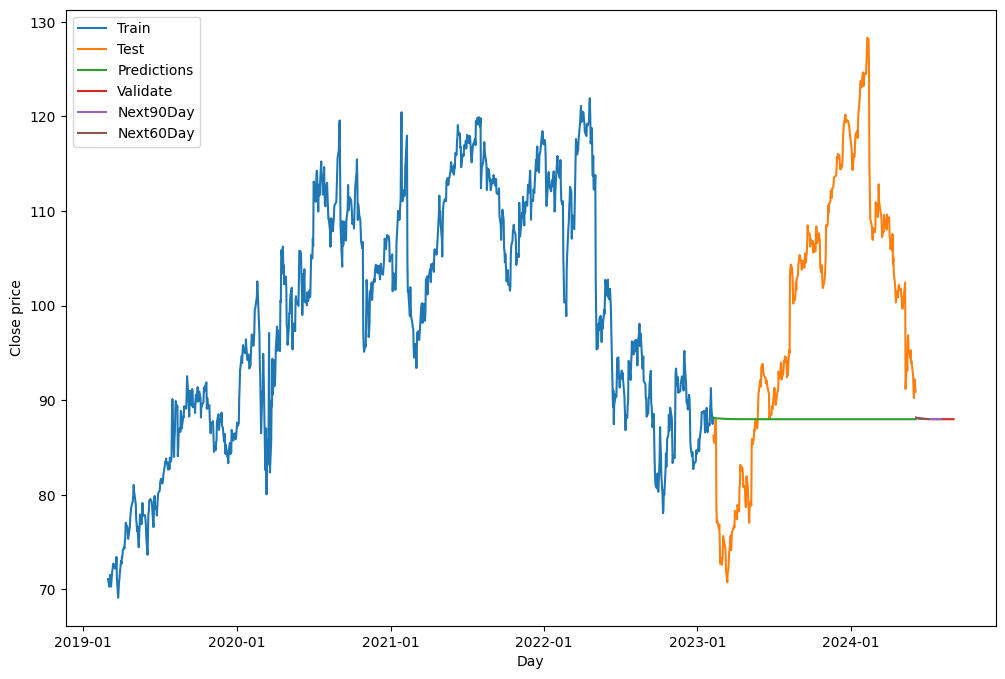

In [12]:
# 8.Vẽ hình
import matplotlib.dates as mdates

plt.figure(figsize=(12, 8))
data['Date'] = pd.to_datetime(data['Date'])
plt.plot(data['Date'][:train_size], train_data['Close'])
plt.plot(data['Date'][train_size:], test_data['Close'])
plt.plot(data['Date'][train_size:], y_pred)
predict_data_index_90 = pd.bdate_range(start=data['Date'][len(data['Date'])-1] + pd.Timedelta(days=1), periods=90, freq='D')
predict_data_index_60 = pd.bdate_range(start=data['Date'][len(data['Date'])-1] + pd.Timedelta(days=1), periods=60, freq='D')
predict_data_index_30 = pd.bdate_range(start=data['Date'][len(data['Date'])-1] + pd.Timedelta(days=1), periods=30, freq='D')
plt.plot(predict_data_index_90 ,y_next_90_days)
plt.plot(predict_data_index_60 ,y_next_60_days)
plt.plot(predict_data_index_30 ,y_next_30_days)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.xlabel('Day')
plt.ylabel('Close price')
plt.legend(['Train', 'Test', 'Predictions','Validate','Next90Day', 'Next60Day', 'Next30Day'])
plt.show()

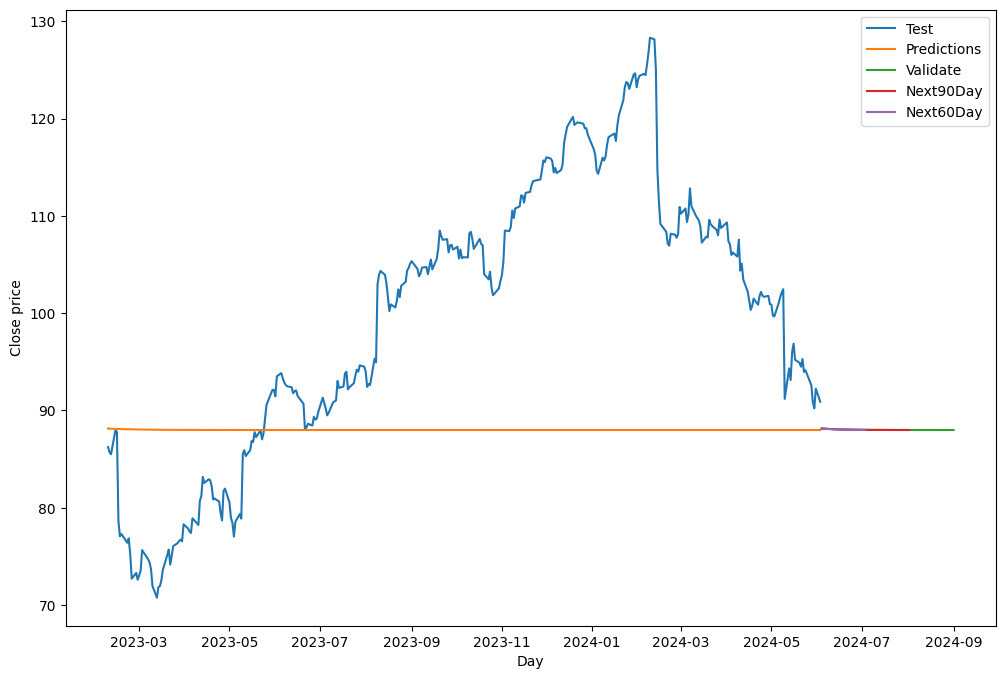

In [13]:
# 8.Vẽ hình test
import matplotlib.dates as mdates

plt.figure(figsize=(12, 8))
data['Date'] = pd.to_datetime(data['Date'])
plt.plot(data['Date'][train_size:], test_data['Close'])
plt.plot(data['Date'][train_size:], y_pred)
predict_data_index_90 = pd.bdate_range(start=data['Date'][len(data['Date'])-1] + pd.Timedelta(days=1), periods=90, freq='D')
predict_data_index_60 = pd.bdate_range(start=data['Date'][len(data['Date'])-1] + pd.Timedelta(days=1), periods=60, freq='D')
predict_data_index_30 = pd.bdate_range(start=data['Date'][len(data['Date'])-1] + pd.Timedelta(days=1), periods=30, freq='D')
plt.plot(predict_data_index_90 ,y_next_90_days)
plt.plot(predict_data_index_60 ,y_next_60_days)
plt.plot(predict_data_index_30 ,y_next_30_days)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.xlabel('Day')
plt.ylabel('Close price')
plt.legend(['Test', 'Predictions','Validate','Next90Day', 'Next60Day', 'Next30Day'])
plt.show()

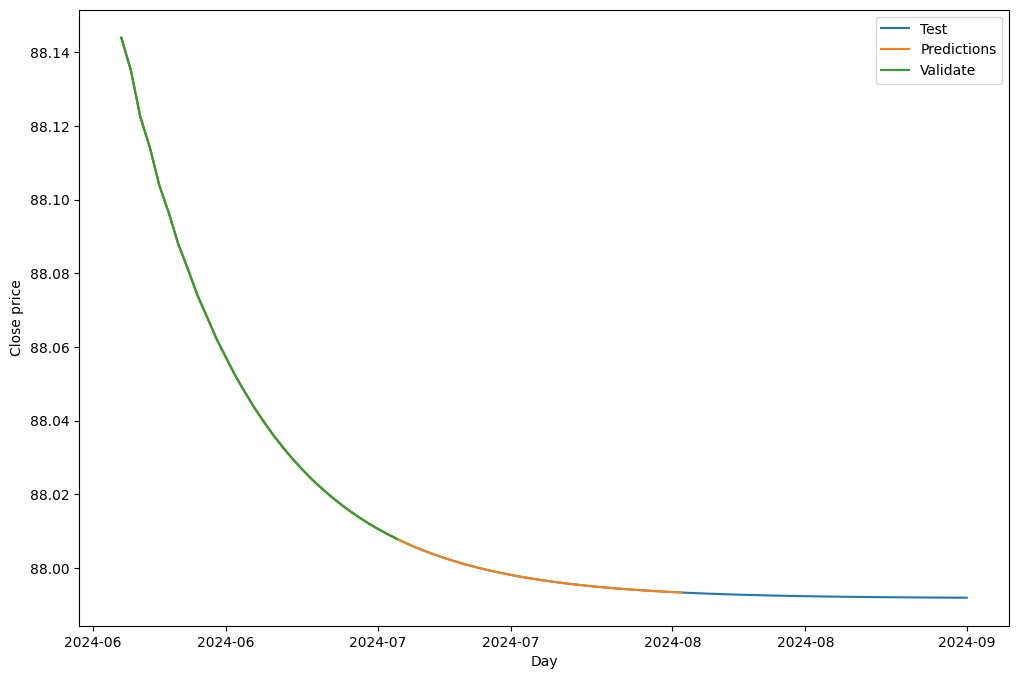

In [14]:
plt.figure(figsize=(12, 8))
data['Date'] = pd.to_datetime(data['Date'])

predict_data_index_90 = pd.bdate_range(start=data['Date'][len(data['Date'])-1] + pd.Timedelta(days=1), periods=90, freq='D')
predict_data_index_60 = pd.bdate_range(start=data['Date'][len(data['Date'])-1] + pd.Timedelta(days=1), periods=60, freq='D')
predict_data_index_30 = pd.bdate_range(start=data['Date'][len(data['Date'])-1] + pd.Timedelta(days=1), periods=30, freq='D')
plt.plot(predict_data_index_90 ,y_next_90_days)
plt.plot(predict_data_index_60 ,y_next_60_days)
plt.plot(predict_data_index_30 ,y_next_30_days)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.xlabel('Day')
plt.ylabel('Close price')
plt.legend(['Test', 'Predictions','Validate','Next90Day', 'Next60Day', 'Next30Day'])
plt.show()